In [1]:
import pandas as pd

df = pd.read_csv("/kaggle/input/openintro-possum/possum.csv")

df.head(5)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [3]:
df['hdlngth'].isnull().sum()

0

In [4]:
df['case'].value_counts()

104    1
103    1
28     1
29     1
30     1
      ..
73     1
74     1
75     1
76     1
1      1
Name: case, Length: 104, dtype: int64

In [5]:
df.corr()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,1.000000,0.970353,-0.194525,-0.209177,-0.125065,-0.334329,0.315351,-0.782368,-0.773727,-0.084078,-0.402303,-0.211671
site,0.970353,1.000000,-0.131423,-0.163646,-0.083548,-0.260843,0.380444,-0.783009,-0.790716,-0.036987,-0.345494,-0.175266
age,-0.194525,-0.131423,1.000000,0.319022,0.285107,0.260280,0.118241,0.126190,0.053405,0.235553,0.334209,0.354298
hdlngth,-0.209177,-0.163646,0.319022,1.000000,0.710827,0.691094,0.287429,0.391605,0.121463,0.347175,0.631498,0.562663
skullw,-0.125065,-0.083548,0.285107,0.710827,1.000000,0.526413,0.255921,0.275059,-0.000537,0.321991,0.629737,0.451838
totlngth,-0.334329,-0.260843,0.260280,0.691094,0.526413,1.000000,0.565646,0.444832,0.154484,0.247786,0.577890,0.519465
taill,0.315351,0.380444,0.118241,0.287429,0.255921,0.565646,1.000000,-0.126277,-0.385136,0.198134,0.174997,0.294493
footlgth,-0.782368,-0.783009,0.126190,0.391605,0.275059,0.444832,-0.126277,1.000000,0.783050,0.005213,0.450590,0.302584
earconch,-0.773727,-0.790716,0.053405,0.121463,-0.000537,0.154484,-0.385136,0.783050,1.000000,-0.165092,0.199230,0.066527
eye,-0.084078,-0.036987,0.235553,0.347175,0.321991,0.247786,0.198134,0.005213,-0.165092,1.000000,0.149338,0.235716


In [6]:
df.columns

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

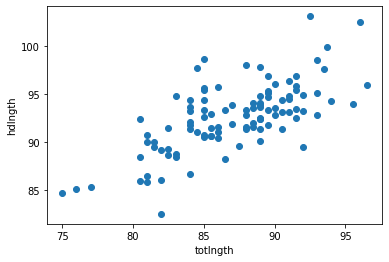

In [9]:
import matplotlib.pyplot as plt

plt.scatter(df['totlngth'],df['hdlngth'])
plt.xlabel('totlngth')
plt.ylabel('hdlngth')
plt.show()

In [28]:
X=df['totlngth']
y=df['hdlngth']

from sklearn.model_selection import train_test_split

import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
from sklearn.linear_model import LinearRegression

X_train =X_train.values.reshape((-1,1))

reg = LinearRegression().fit(X_train, y_train)

X_test=X_test.values.reshape((-1,1))

reg.score(X_train,y_train)

y_pred=reg.predict(X_test)

from sklearn.metrics import mean_squared_log_error

mean_squared_log_error(y_pred,y_test)

0.0008364116434502357